In [33]:
#Step 1: Load the Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import streamlit as st



In [34]:
# Load the provided data
population_data = pd.read_csv('datasets/Countries_Population_final.csv')
# Load the provided data
population_countries = pd.read_csv('datasets/Countries_names.csv')


In [35]:

# Western Balkan countries
western_balkan_countries = ["Albania", "Bosnia and Herzegovina", "Croatia", "Kosovo", "Montenegro", "North Macedonia", "Serbia"]


In [36]:
# Filter data for Western Balkan countries
balkan_data = population_data[['Year'] + western_balkan_countries]


In [37]:
# Display the first few rows of the filtered data
balkan_data.head()

,Year,Albania,Bosnia and Herzegovina,Croatia,Kosovo,Montenegro,North Macedonia,Serbia
0,1960,1608800.0,3262539.0,4140181.0,947000.0,480579.0,1462368.0,6608000.0
1,1961,1659800.0,3325333.0,4167292.0,966000.0,491140.0,1481112.0,6655000.0
2,1962,1711319.0,3387512.0,4196712.0,994000.0,502558.0,1497338.0,6696000.0
3,1963,1762621.0,3448532.0,4225675.0,1022000.0,513409.0,1511854.0,6732000.0
4,1964,1814135.0,3507959.0,4252876.0,1050000.0,521753.0,1529507.0,6765000.0


In [38]:
# Make a copy of the DataFrame to avoid SettingWithCopyWarning
balkan_data_clean = balkan_data.copy()



In [39]:
# Drop rows with missing data
balkan_data_clean.dropna(inplace=True)


In [40]:
# Display the first few rows of the filtered data
print(balkan_data_clean.head())

   Year    Albania  Bosnia and Herzegovina    Croatia     Kosovo  Montenegro  \
0  1960  1608800.0               3262539.0  4140181.0   947000.0    480579.0   
1  1961  1659800.0               3325333.0  4167292.0   966000.0    491140.0   
2  1962  1711319.0               3387512.0  4196712.0   994000.0    502558.0   
3  1963  1762621.0               3448532.0  4225675.0  1022000.0    513409.0   
4  1964  1814135.0               3507959.0  4252876.0  1050000.0    521753.0   

   North Macedonia     Serbia  
0        1462368.0  6608000.0  
1        1481112.0  6655000.0  
2        1497338.0  6696000.0  
3        1511854.0  6732000.0  
4        1529507.0  6765000.0  


In [41]:
# Check for missing values
missing_values = balkan_data_clean.isnull().sum()
print("Missing values after dropping rows with missing data:")
print(missing_values)


Missing values after dropping rows with missing data:
Year                      0
Albania                   0
Bosnia and Herzegovina    0
Croatia                   0
Kosovo                    0
Montenegro                0
North Macedonia           0
Serbia                    0
dtype: int64


Albania:
  Best fit line: y = 0.008x + -14.619
  R2 coefficient: 0.359
  Mean Squared Error (Normalization): 0.0267
  2040 Albania population: 3,426,979
  2050 Albania population: 3,556,120


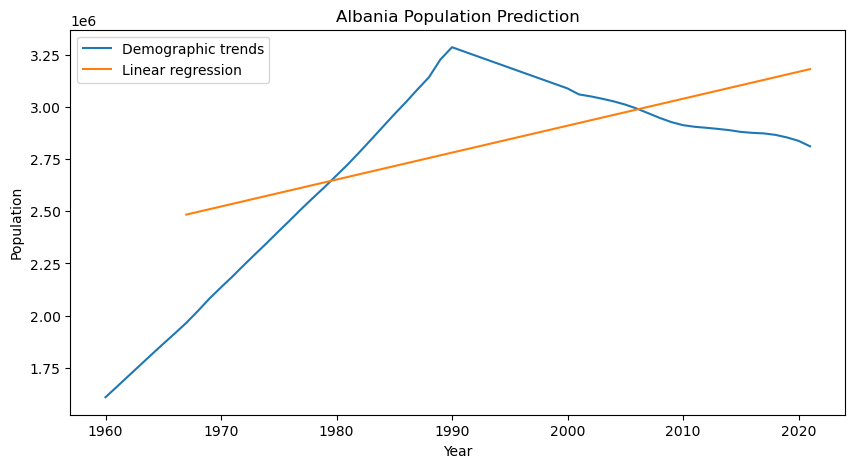

Bosnia and Herzegovina:
  Best fit line: y = -0.008x + 16.081
  R2 coefficient: 0.225
  Mean Squared Error (Normalization): 0.0525
  2040 Bosnia and Herzegovina population: 3,533,707
  2050 Bosnia and Herzegovina population: 3,437,303


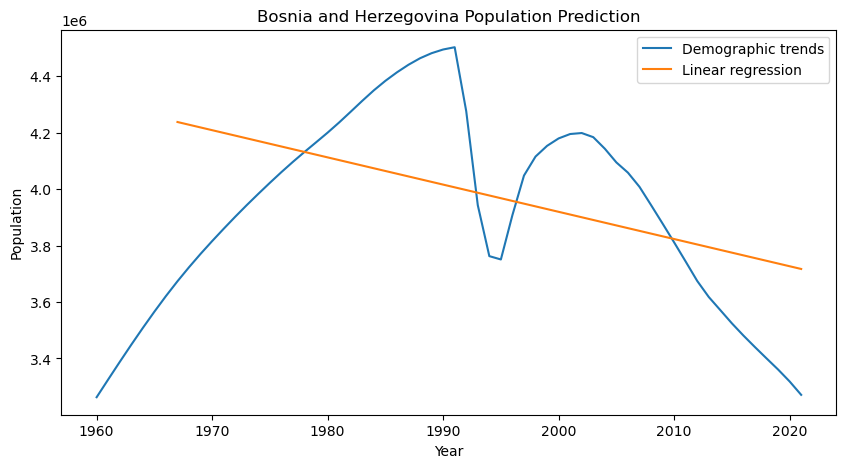

Croatia:
  Best fit line: y = -0.010x + 19.801
  R2 coefficient: 0.427
  Mean Squared Error (Normalization): 0.0314
  2040 Croatia population: 4,051,615
  2050 Croatia population: 3,967,108


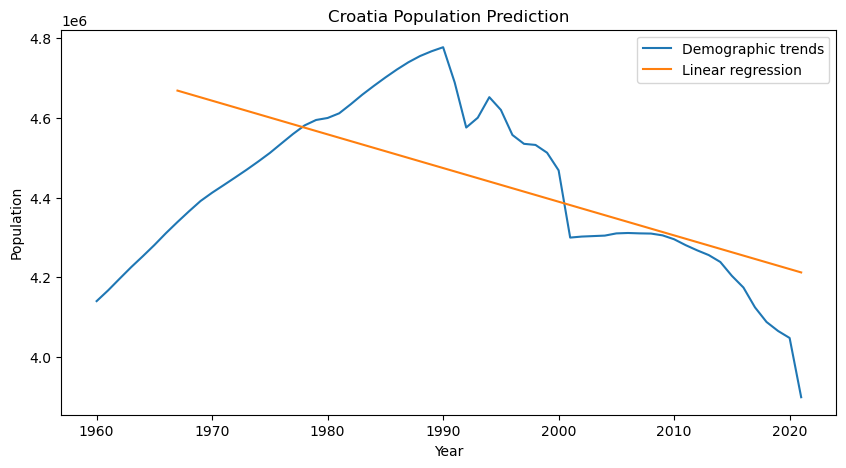

Kosovo:
  Best fit line: y = 0.009x + -17.776
  R2 coefficient: 0.502
  Mean Squared Error (Normalization): 0.0213
  2040 Kosovo population: 2,156,084
  2050 Kosovo population: 2,261,261


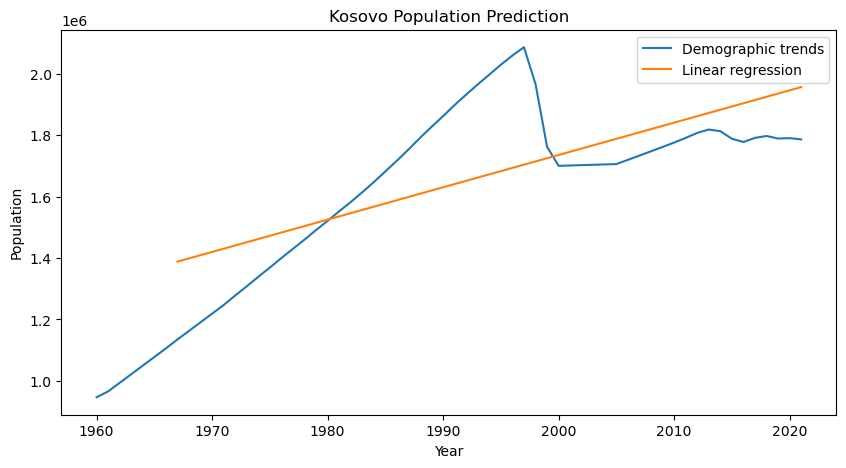

Montenegro:
  Best fit line: y = 0.013x + -25.750
  R2 coefficient: 0.747
  Mean Squared Error (Normalization): 0.0151
  2040 Montenegro population: 679,546
  2050 Montenegro population: 698,419


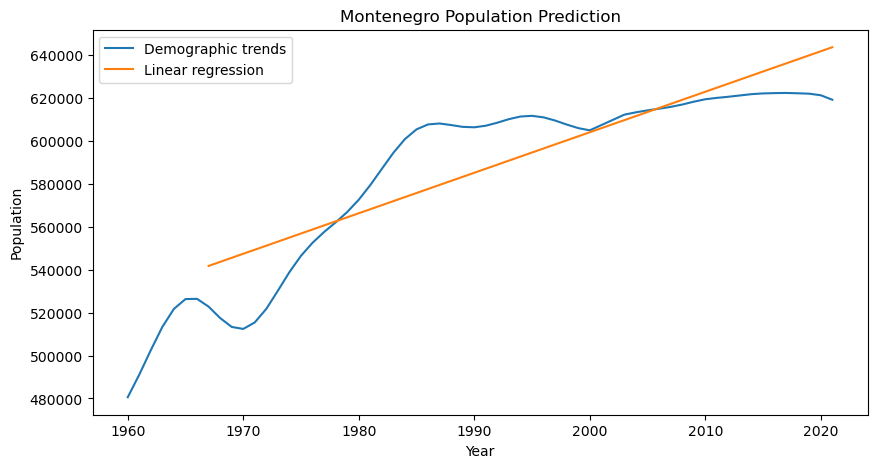

North Macedonia:
  Best fit line: y = 0.012x + -23.145
  R2 coefficient: 0.719
  Mean Squared Error (Normalization): 0.0142
  2040 North Macedonia population: 2,295,727
  2050 North Macedonia population: 2,369,511


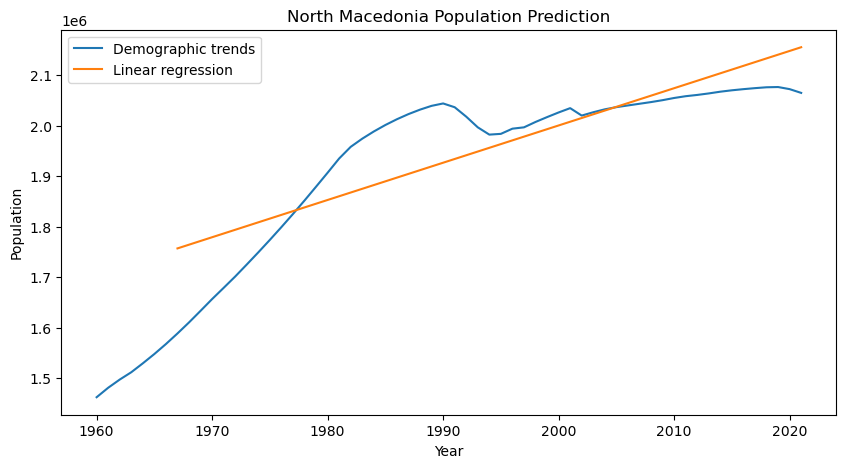

Serbia:
  Best fit line: y = -0.000x + 1.254
  R2 coefficient: 0.001
  Mean Squared Error (Normalization): 0.0477
  2040 Serbia population: 7,303,945
  2050 Serbia population: 7,300,432


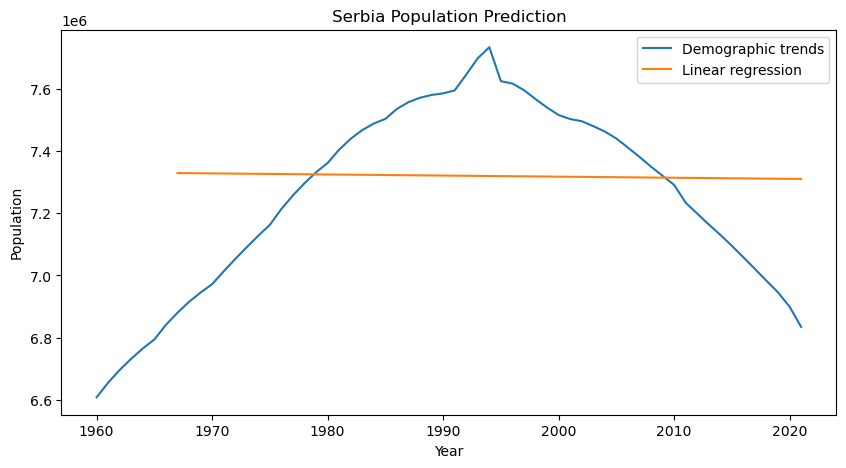

In [42]:
# Prepare for linear regression
results = {}

for country in western_balkan_countries:
    X = balkan_data_clean[['Year']].values
    Y = balkan_data_clean[country].values
    
    # Normalize the target variable
    minimum = Y.min()
    maximum = Y.max()
    Y_normalized = (Y - minimum) / (maximum - minimum)

    # Split data for training
    X_train = X[7:]
    Y_train = Y_normalized[7:]

    # Train the linear regression model
    model = linear_model.LinearRegression()
    model.fit(X_train, Y_train)
    ypred = model.predict(X_train)
    
    # Calculate model parameters
    m = model.coef_[0]
    d = model.intercept_
    r2 = r2_score(Y_train, ypred)
    mse = metrics.mean_squared_error(Y_train, ypred)

    # Predictions for specific years
    prediction_years = np.array([[2040], [2050]])
    predictions_normalized = model.predict(prediction_years)
    predictions = predictions_normalized * (maximum - minimum) + minimum
    
    print(f"{country}:")
    print(f"  Best fit line: y = {m:.3f}x + {d:.3f}")
    print(f"  R2 coefficient: {r2:.3f}")
    print(f"  Mean Squared Error (Normalization): {mse:.4f}")
    print(f"  2040 {country} population: {predictions[0]:,.0f}")
    print(f"  2050 {country} population: {predictions[1]:,.0f}")

    # Save results for plotting
    results[country] = {
        'X': X,
        'Y': Y,
        'model': model,
        'minimum': minimum,
        'maximum': maximum
    }

    # Plot the predictions
    plt.figure(figsize=(10, 5))
    plt.plot(X, Y, label='Demographic trends')
    plt.plot(X_train, ypred * (maximum - minimum) + minimum, label='Linear regression')
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.title(f'{country} Population Prediction')
    plt.legend()
    plt.show()


In [10]:
!pip install torch torchvision torchaudio


In [43]:
import torch
import torch.nn as nn
import plotly.express as px
import os  # Add this import statement to use os functions


In [44]:
# Define the CNN model
class CNN(nn.Module):
    def __init__(self, input_size):
        super(CNN, self).__init__()
        self.input_size = input_size
        self.convs = nn.Sequential(
            nn.Conv1d(in_channels=1, out_channels=10, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2),
            nn.Conv1d(in_channels=10, out_channels=10, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2)
        )
        self.fc = nn.Linear(in_features=int(input_size/2/2*10), out_features=1)
    
    def forward(self, x):
        x = self.convs(x)
        x = x.view(x.size()[0], -1)
        x = self.fc(x)
        return x


In [45]:

# Initialize the model
model_cnn = CNN(input_size=16)

In [47]:

# Define a simple optimizer and loss function for demonstration purposes
optimizer = torch.optim.Adam(model_cnn.parameters(), lr=0.001)
criterion = nn.MSELoss()

In [48]:

# Dummy training loop (replace with actual training data and logic)
X_train = np.random.rand(100, 1, 16).astype(np.float32)  # Replace with actual training data
Y_train = np.random.rand(100).astype(np.float32)  # Replace with actual target data

for epoch in range(10):  # Replace with the actual number of epochs
    model_cnn.train()
    optimizer.zero_grad()
    outputs = model_cnn(torch.from_numpy(X_train))
    loss = criterion(outputs.squeeze(), torch.from_numpy(Y_train))
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')


Epoch 1, Loss: 0.3774445652961731
Epoch 2, Loss: 0.3682624101638794
Epoch 3, Loss: 0.3593565821647644
Epoch 4, Loss: 0.3507108986377716
Epoch 5, Loss: 0.34231483936309814
Epoch 6, Loss: 0.3341173529624939
Epoch 7, Loss: 0.32611626386642456
Epoch 8, Loss: 0.31832221150398254
Epoch 9, Loss: 0.31071415543556213
Epoch 10, Loss: 0.30330610275268555


In [49]:


# Prepare the model directory
model_dir = './data/models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

In [50]:

# Save the model
model_path = os.path.join(model_dir, 'CN_CNN16.pkl')
torch.save(model_cnn.state_dict(), model_path)
print(f"Model saved at {model_path}")


Model saved at ./data/models\CN_CNN16.pkl


In [51]:
# Load the pre-trained model
model_cnn = CNN(input_size=16)

In [52]:

# Load the model weights
model_path = os.path.join(model_dir, 'CN_CNN16.pkl')

try:
    model_cnn.load_state_dict(torch.load(model_path))
    model_cnn.eval()
except FileNotFoundError:
    print(f"Model file not found at {model_path}. Please check the file path or create a new model.")

In [53]:

# List of Western Balkan countries 
countries = ['Kosovo', 'Montenegro', 'North Macedonia', 'Albania', 'Bosnia and Herzegovina', 'Serbia']

In [54]:
# Prepare a DataFrame to store the results
all_predictions = []

for country in countries:
    # Prepare data for CNN
    length = 16
    X_cnn = np.zeros((22, 1, length))  # 22 because we need historical data + 21 future years
    Y_cnn = np.zeros(21)  # 21 future years

    # Use the target country for the CNN
    cn_data = balkan_data_clean[['Year', country]].dropna()
    years_cnn = cn_data['Year'].values
    population_cnn = cn_data[country].values

    # Normalize the historical data
    X_cnn[0, 0] = (population_cnn[-length:] - population_cnn.min()) / (population_cnn.max() - population_cnn.min())

    # Predict future populations
    for i in range(21):  # Adjusted loop to match length of Y_cnn and future_years_cnn
        next_pred = (model_cnn(torch.from_numpy(X_cnn[i].reshape(1, 1, length)).to(torch.float32))).detach().numpy().flatten()
        X_cnn[i + 1, :, :length - 1] = X_cnn[i, :, -(length - 1):]
        X_cnn[i + 1, :, -1] = next_pred
        Y_cnn[i] = next_pred[0]  # Extract the scalar value

    # Generate future years and future population values
    future_years_cnn = np.arange(2030, 2051)
    future_population_values = Y_cnn * (population_cnn.max() - population_cnn.min()) + population_cnn.min()
    future_population_cnn = np.concatenate((population_cnn, future_population_values))

    # Adjust lengths of arrays for DataFrame creation
    years_combined = np.concatenate((years_cnn, future_years_cnn))

    # Make sure `years_combined` and `future_population_cnn` are the same length
    if len(years_combined) != len(future_population_cnn):
        raise ValueError(f"Mismatch in lengths for {country}: years_combined has length {len(years_combined)}, but future_population_cnn has length {len(future_population_cnn)}")

    # Create the DataFrame for the current country
    pred_cnn_data = pd.DataFrame({'Year': years_combined, 'Country': country, 'Total Population': future_population_cnn})

    # Append the results to the all_predictions list
    all_predictions.append(pred_cnn_data)

# Iterate through all_predictions and print each DataFrame
for idx, pred_df in enumerate(all_predictions):
    country = countries[idx]
    print(f"Predictions for {country}:")
    print(pred_df.head())  # Display the first few rows of each DataFrame
    print("\n")


Predictions for Kosovo:
   Year Country  Total Population
0  1960  Kosovo          947000.0
1  1961  Kosovo          966000.0
2  1962  Kosovo          994000.0
3  1963  Kosovo         1022000.0
4  1964  Kosovo         1050000.0


Predictions for Montenegro:
   Year     Country  Total Population
0  1960  Montenegro          480579.0
1  1961  Montenegro          491140.0
2  1962  Montenegro          502558.0
3  1963  Montenegro          513409.0
4  1964  Montenegro          521753.0


Predictions for North Macedonia:
   Year          Country  Total Population
0  1960  North Macedonia         1462368.0
1  1961  North Macedonia         1481112.0
2  1962  North Macedonia         1497338.0
3  1963  North Macedonia         1511854.0
4  1964  North Macedonia         1529507.0


Predictions for Albania:
   Year  Country  Total Population
0  1960  Albania         1608800.0
1  1961  Albania         1659800.0
2  1962  Albania         1711319.0
3  1963  Albania         1762621.0
4  1964  Albania   

In [32]:

# Display future population predictions for each country
for country in countries:
    country_data = all_predictions_df[all_predictions_df['Country'] == country]
    print(f"{country} Population Predictions:")
    print(f"2030 Population: {country_data[country_data['Year'] == 2030]['Total Population'].values[0]:,.0f}")
    print(f"2040 Population: {country_data[country_data['Year'] == 2040]['Total Population'].values[0]:,.0f}")
    print(f"2050 Population: {country_data[country_data['Year'] == 2050]['Total Population'].values[0]:,.0f}")
    print()


Kosovo Population Predictions:
2030 Population: 807,541
2040 Population: 810,766
2050 Population: 780,724

Montenegro Population Predictions:
2030 Population: 464,511
2040 Population: 465,202
2050 Population: 460,208

North Macedonia Population Predictions:
2030 Population: 1,392,300
2040 Population: 1,395,953
2050 Population: 1,374,135

Albania Population Predictions:
2030 Population: 1,403,866
2040 Population: 1,407,469
2050 Population: 1,363,918

Bosnia and Herzegovina Population Predictions:
2030 Population: 3,095,081
2040 Population: 3,097,767
2050 Population: 3,080,007

Serbia Population Predictions:
2030 Population: 6,461,250
2040 Population: 6,467,434
2050 Population: 6,442,778



In [55]:

# Combine predictions for all countries into one DataFrame
all_predictions_df = pd.concat(all_predictions, ignore_index=True)

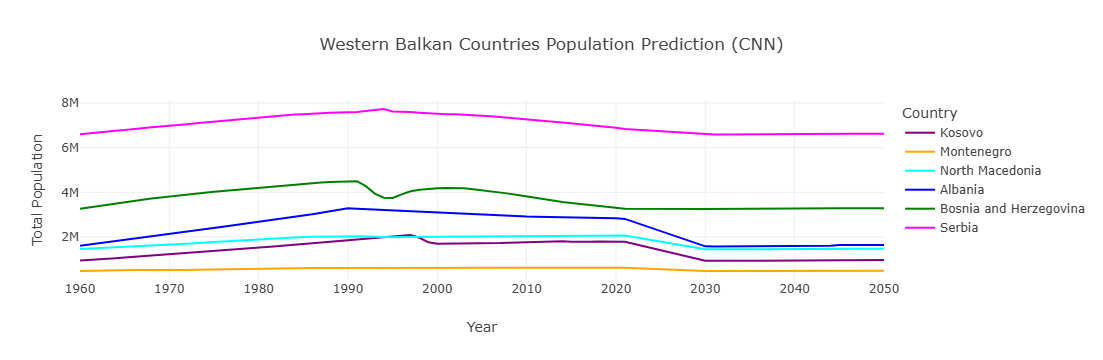

In [61]:
import plotly.express as px


# Assuming all_predictions is a list of DataFrames for each country
all_predictions_df = pd.concat(all_predictions, ignore_index=True)

# Ensure 'Country' column is categorical
all_predictions_df['Country'] = pd.Categorical(all_predictions_df['Country'])



color_map = {
    'Albania': 'blue',
    'Bosnia and Herzegovina': 'green',
    'Croatia': 'red',
    'Kosovo': 'purple',
    'Montenegro': 'orange',
    'North Macedonia': 'cyan',
    'Serbia': 'magenta'
}

fig = px.line(all_predictions_df, x='Year', y='Total Population', color='Country', title='Western Balkan Countries Population Prediction (CNN)', color_discrete_map=color_map)
# Plot results
fig.show()
